# 02. Image processing
~~~
pip3 install scikit-image
~~~

In [13]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform

%matplotlib inline

In [4]:
cwd = os.getcwd()
print("Cureent folder is {folder_name}".format(folder_name=cwd))

Cureent folder is /Users/kyle/Dropbox/workspace/Deep_Learning_starting_with_the_latest_papers/Lecture_Note/02. DL Intro


In [8]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

In [12]:
cwd

'/Users/kyle/Dropbox/workspace/Deep_Learning_starting_with_the_latest_papers/Lecture_Note/02. DL Intro'

In [20]:
parent_dir = os.path.abspath('..')
cat = imread(parent_dir + "/images/cat.jpg")
p = os.path.abspath('..')
print_typeshape(cat)

Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


## Data load

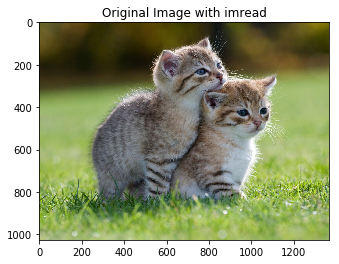

In [21]:
plt.figure(0)
plt.imshow(cat)
plt.title("Original Image with imread")
plt.draw()

In [24]:
# array (정수로 들어가 있음)
cat[0][0]

array([104,  95,  36], dtype=uint8)

Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


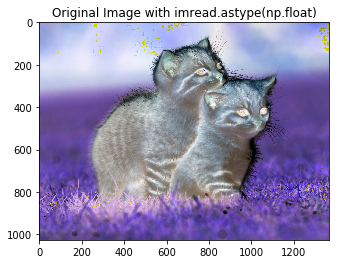

In [22]:
cat2 = imread(parent_dir + "/images/cat.jpg").astype(np.float)
print_typeshape(cat2)

# imread할 시 이미지는 정수타입이라 생각하고 1-255로 이루어져 있다고 생각함
# 그러나 지금은 float타입이라 이미지가 이상하게 나타남
plt.figure(0)
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

In [25]:
cat2[0][0]

array([ 104.,   95.,   36.])

Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


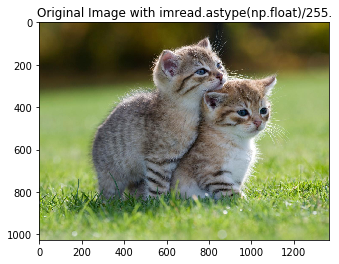

In [27]:

cat3 = imread(parent_dir + "/images/cat.jpg").astype(np.float)
print_typeshape(cat3)

plt.figure(0)
plt.imshow(cat3/255.) # 255. 으로 나눠줌
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

In [29]:
cat3[0][0]/255.

array([ 0.40784314,  0.37254902,  0.14117647])

## Resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


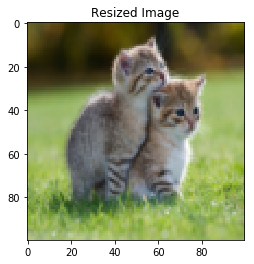

In [31]:
# Resize
catsmall = imresize(cat, [100, 100, 3])
print_typeshape(catsmall)
# Plot
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

## grayscale

size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


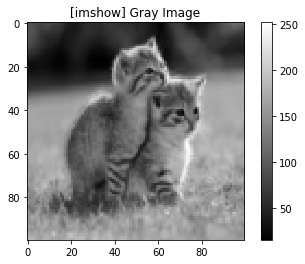

In [32]:
# cv2에는 grayscale이 존재하지만, 현재 패키지엔 존재하지 않아 함수로 생성
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        # 채널이 있는 경우
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb
catsmallgray = rgb2gray(catsmall)

print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

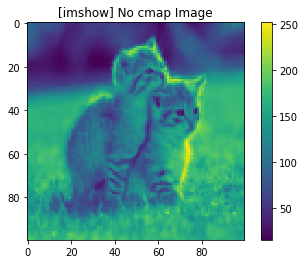

In [35]:
#cmap을 지정해주지 않는 경우
plt.figure(2)
plt.imshow(catsmallgray)
plt.title("[imshow] No cmap Image")
plt.colorbar()
plt.draw()

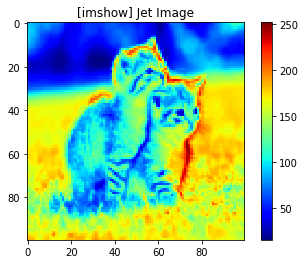

In [36]:
# jet란 것도 존재
plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("jet"))
plt.title("[imshow] Jet Image")
plt.colorbar()
plt.draw()

In [38]:
# resize : 주어진 이미지 사이즈를 수정
# reshape : 모양을 변경. 각 element의 개수는 변함 없음

In [40]:
# 벡터로 변환
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>


In [41]:
# 매트릭스로 변환
catmatrix = np.reshape(catrowvec, (100, 100));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

size of catmatrix is (100, 100)
type of catmatrix is <class 'numpy.ndarray'>


In [43]:
path = parent_dir + "/images/cats"
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

print ("%d files in %s" % (len(os.listdir(path)), path))

38 files in /Users/kyle/Dropbox/workspace/Deep_Learning_starting_with_the_latest_papers/Lecture_Note/images/cats


In [44]:
# Append Images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    # For all files 
    ext = os.path.splitext(f)[1]
    # Check types 
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0]+os.path.splitext(f)[1])
print ("%d images loaded" % (len(imgs))) 

38 images loaded


In [45]:
# Check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx]
           , range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))    

Type of 'imgs':  <class 'list'>
Length of 'imgs':  38
[0] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (12).jpeg
    Size of 'curr_img': (201, 251, 3)
[1] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (25).jpeg
    Size of 'curr_img': (177, 284, 3)
[2] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (32).jpeg
    Size of 'curr_img': (194, 259, 3)


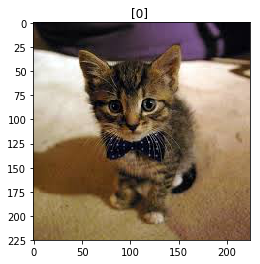

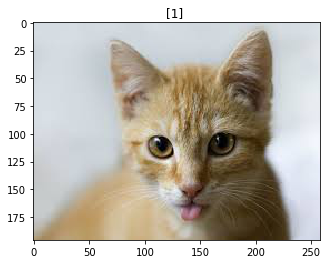

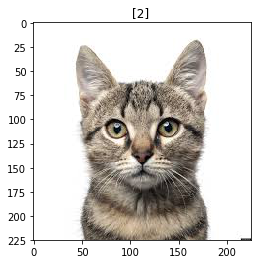

In [46]:
# Plot Images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] ")
    plt.draw() 